In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


fruits = pd.read_table('./course3_downloads/fruit_data_with_colors.txt')

fruits.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
print('Keys of fruit_data_with_colors: \n{}'.format(fruits.keys()))

Keys of fruit_data_with_colors: 
Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')


In [3]:
lookup_code = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

lookup_code

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [99]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


<IPython.core.display.Javascript object>


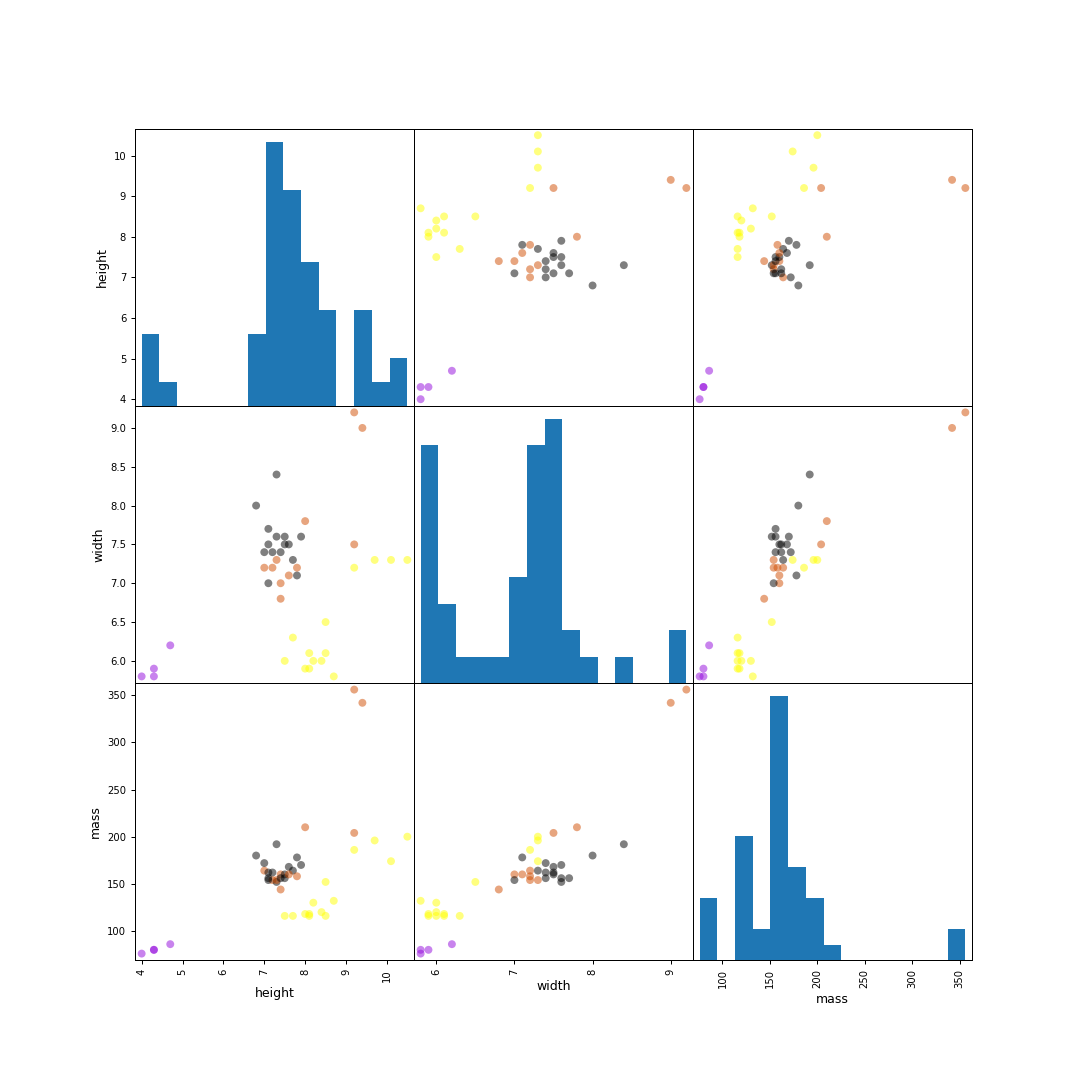

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000282CEA0C1C0>,
      dtype=object)

In [66]:
from matplotlib import cm


cmap = cm.get_cmap('gnuplot')

scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins': 15}, figsize=(12, 12), cmap=cmap)

scatter

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [101]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [102]:
knn.score(X_test, y_test)

0.5333333333333333

In [103]:
X_new = np.array([[20, 4.3, 5.5]])
print('X_new.shape {}'.format(X_new.shape))

X_new.shape (1, 3)


In [109]:
prediction = knn.predict(X_new)

print('prediction: {}'.format(prediction))

print('predicted fruit name: {}'.format(fruits['fruit_name'][prediction]))

prediction: [2]
predicted fruit name: 2    apple
Name: fruit_name, dtype: object


In [110]:
print('X_train shape: {}'.format(X_train.shape))

X_train shape: (44, 3)


In [111]:
unknown = np.array([[100, 6.3, 8.5]])
print('unknown shape : {}'.format(unknown.shape))

unknown shape : (1, 3)


In [112]:
predi = knn.predict(unknown)
print('prediction: {}'.format(predi))
print('predicted fruit name: {}'.format(fruits['fruit_name'][predi]))

prediction: [4]
predicted fruit name: 4    mandarin
Name: fruit_name, dtype: object


In [108]:
print('Test set score: {}'.format(knn.score(X_test, y_test)))

Test set score: 0.5333333333333333


In [63]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [3 1 4 4 1 1 1 3 3 4 2 1 3 1 4]


In [64]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.53
